In [13]:
from chart_studio.plotly import plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import scipy

df = pd.read_csv('data.csv')
df["created_at"] = pd.to_datetime(df["created_at"])
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11


In [14]:
import plotly.express as px
# df = px.data.tips()
fig = px.box(df, y="order_amount")
fig.show()

What I want to do:
Check if it is normal-Histogram, QQ
If it is normal, apply outlier detection on 1D data, if outlier is found remove it

Normalty test:

Graphical

Histogram Plot
Quantile-Quantile Plot
Statistical

Shapiro-Wilk Test
Kolmogorov-Smirnov
D'Agostino's $K^{2}$ Test
Anderson-Darling Test


Interactive plot
Show the effect of filtering out the values using a slider on histogram and boxplot, show how mean, median  and mode change

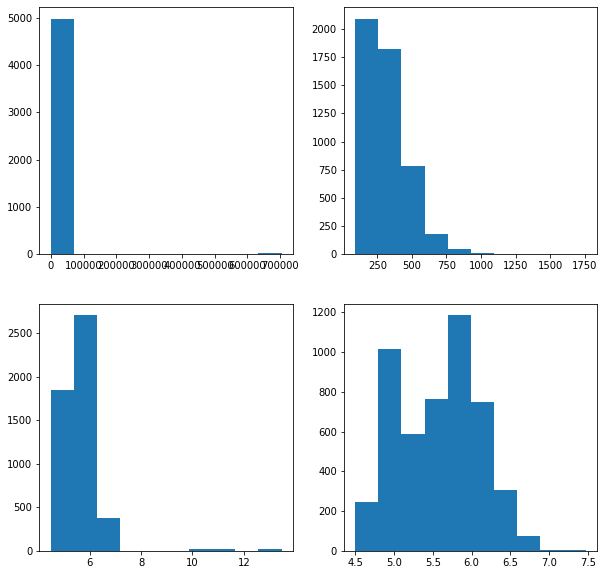

In [4]:
df = pd.read_csv('data.csv')
df_fil = df[df['order_amount']<4000]

f,ax = plt.subplots(2,2, figsize=(10, 10))
h1 = ax[0,0].hist(df['order_amount'])
h2 = ax[0,1].hist(df_fil['order_amount'])
h3 = ax[1,0].hist(np.log(df['order_amount']))
h4 = ax[1,1].hist(np.log(df_fil['order_amount']))

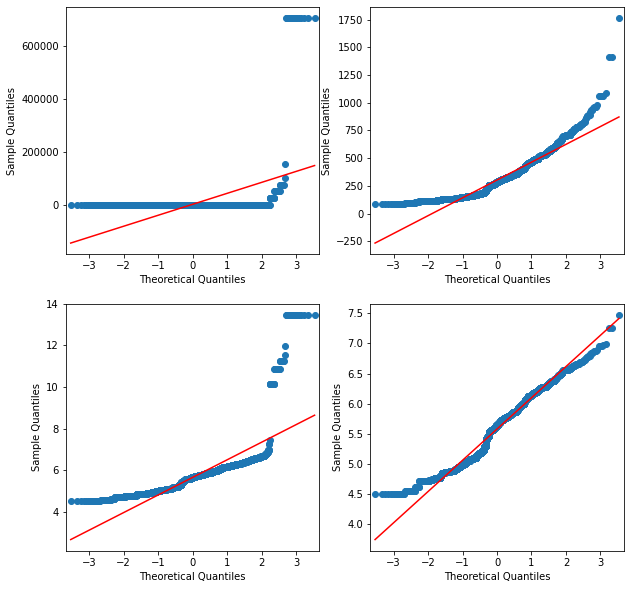

In [5]:
from statsmodels.graphics.gofplots import qqplot

f,ax = plt.subplots(2,2, figsize=(10, 10))

qqplot_data = qqplot(df["order_amount"], line='s', ax = ax[0,0]).gca().lines
qqplot_data_fil = qqplot(df_fil["order_amount"], line='s', ax = ax[0,1]).gca().lines
qqplot_data_log = qqplot(np.log(df["order_amount"]), line='s', ax = ax[1,0]).gca().lines
qqplot_data_fil_log = qqplot(np.log(df_fil["order_amount"]), line='s', ax = ax[1,1]).gca().lines

In addition to checking the normality assumption, the lower and upper tails of the normal probability plot can be a useful graphical technique for identifying potential outliers. In particular, the plot can help determine whether we need to check for a single outlier or whether we need to check for multiple outliers.

In [8]:
from scipy.stats import normaltest

stat, p = normaltest(df["order_amount"])

# interpret
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'

result_mat = [
    ['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'],
    [len(df["order_amount"]), stat, p, msg]
]

normt_table = ff.create_table(result_mat)
normt_table['data'][0].colorscale=[[0, '#2a3f5f'],[1, '#ffffff']]
normt_table['layout']['height']=200
normt_table['layout']['margin']['t']=50
normt_table['layout']['margin']['b']=50
normt_table

Things I want to do:
    1. Boxplot linked with a slider, also show mean, median and mode

In [68]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import mode

# Create figure
fig = go.Figure()

# Add traces, one for each slider step
thshld_vals = [100, 200, 300, 400, 500, 600, 700, 1000, 2000, 5000, 10000, 50000, 100000, 150000, 200000, 500000, 800000]
means, medians, modes = [], [], []

for max_val in thshld_vals:
    df_fil = df[df["order_amount"]<=max_val]
    fig.add_trace(
        go.Histogram(x=list(df_fil["order_amount"]))
    )
    means.append(np.round(np.mean(df_fil["order_amount"]), 2))
    medians.append(np.round(np.median(df_fil["order_amount"]), 2))
    modes.append(mode(df_fil["order_amount"])[0][0])


# Make 10th trace visible
fig.data[0].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Distribution of Order Amount clipped above: "+str(thshld_vals[i])+" | Mean: "+str(means[i])+" | Median: "+str(medians[i])+" | Mode: "+str(modes[i])}],
        label = thshld_vals[i]
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Upper Limit on Order Amount: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()